<a href="https://colab.research.google.com/github/achraftha/amo_big_data/blob/main/BDCC_Projet_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information for groups working on projects 7 (Future Arctic sea ice) and 8 (the Atlantic Multidecadal Oscillation)

The aim of this notebook is to give you some information that might be useful for starting your projects: 

- Part A provides you with a quick introduction to the CMIP6 project and ensemble modelling. It also contains a list of links that provide details about the data that are available to you in the CMIP6 catalogue. You can use this to help you to decide what data you want to analyse for your project.
- Part B provides some examples of how to plot data on maps easily, by combining xarray (which you saw in Guillaume's Pangeo session last week) with Cartopy

## A. Data sources and information about CMIP6

### 1. Introduction
Projects 7 & 8 require you to analyse model output from the CMIP6 project. It is possible to access these data a number of ways, including via the cloud, since Google host a part of these data via their Public Datasets programme (https://cloud.google.com/blog/products/data-analytics/new-climate-model-data-now-google-public-datasets). For your projects, this is how you will access the CMIP6 data. As you saw last week in class, this method means that you will be able to analyse the data directly in Colab without downloading anything to your machine.

### 2. What is ensemble modelling and why do we do it?
CMIP6 uses an ensemble modelling strategy. What does this mean?

In the context of CMIP6, an ensemble of model simulations is simply a collection of simulations that have been created using exactly the same configuration for everything, with the exception of the initial conditions. These small differences in the initial state can lead to much larger differences in the forecast over time, as popularised in the so-called "butterfly effect".

We use ensemble modelling to help us understand the probability of the events simulated by the model occurring. For example, imagine that we use an ensemble of 5 simulations to try to forecast next week's weather, and all 5 simulations predict that it will rain in Brest. In this case, we will be more likely to believe that it will rain next week than if our results had been that 2 of our simulations told us that it would rain, 2 told us that it would be sunny and 1 told us that it would snow.

The aim of the ensemble approach in climate modelling (as in CMIP6) is the same as in the weather forecasting case: it is an attempt to quantify how much we believe the predictions of the future climate.

### 3. What is CMIP6?
CMIP = Coupled Model Intercomparison Project (wikipedia page: https://en.wikipedia.org/wiki/Coupled_Model_Intercomparison_Project)

The CMIP programme aims to improve our knowledge of climate change. It began in 1995, and has already been through 5 "phases". Each "phase" corresponds to a coordinated effort to collect together a number of climate simulations created by research centres around the world. These simulations are then made freely available for anybody to download and analyse. Phase 6 is now underway: the data that you will be analysing are thus only recently available, and are likely to be used in research studies for about the next ten years or so.

A number of experiments are defined at each phase. These often consist of "historical" experiments, which simulate the climate over the past decade, and a number of future experiments, which simulate the future climate in response to certain prescribed greenhouse gas concentration scenarios, which should represent the response to possible future decisions made by society. (If you are interested in reading more about these, this article provides a nice introduction: https://www.carbonbrief.org/explainer-how-shared-socioeconomic-pathways-explore-future-climate-change)

### 4. What data are available for your projects?
The CMIP6 catalogue contains a lot of data: the entire archive may eventually comprise 20PB of data when all the simulations have been completed! Not all of this data is available yet, and not all available data is stored in the Cloud, so you will need to check to see what is available when deciding which model(s) and scenario(s) you want to analyse.

The people at Pangeo have written some useful summaries that describe:

- the data available in the Cloud: https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q/edit
- a list of the models available: https://docs.google.com/spreadsheets/d/13DHeTEH_8G08vxTMX1Fs-WbAA6SamBjDdh0fextdcGE/edit#gid=165882553
- a list of the variables available: https://docs.google.com/spreadsheets/d/1UUtoz6Ofyjlpx5LdqhKcwHFz2SGoTQV2_yekHyMfL9Y/edit#gid=1221485271

They have also produced an example notebook that shows how to load in air temperature. You can either run it via Binder on the Pangeo infrastructure: https://binder.pangeo.io/v2/gh/pangeo-data/pangeo-cmip6-examples/master or run it directly in Colab: https://colab.research.google.com/drive/19iEVxE_9QoTeg4st7MmucHJUmO93NXHp

Their notebook is an excellent introduction: it should provide you with everything that you need to get started loading the data. I recommend that you look at it!

## B. Using xarray with Cartopy

Last week we talked a lot about accessing and analysing data, but we didn't talk much about how to make figures. In the geosciences, often we want to make maps. Unfortunately, sometimes this can be more difficult than we would like! Model grids are often irregular, and it can be difficult to plot data in the polar regions, where all longitudes get closer and closer together, and finally converge to a single point.

The Pangeo notebook shows an example of loading CMIP6 data using xarray. One of the really nice features of xarray is that it integrates with the plotting library Cartopy (https://scitools.org.uk/cartopy/docs/latest/) to enable us to change map projections and easily transform our data. We'll look at an example for the Arctic below.

Let's load in the sea surface height for the IPSL model in the Shared Socioeconomic Pathway 2 scenario:

In [2]:
# first we have to install some libraries in Colab
!pip install zarr
!pip install gcsfs
!apt-get -qq install python-cartopy python3-cartopy;
!pip uninstall -y shapely;    # cartopy and shapely don't work well together at the moment
!pip install shapely --no-binary shapely; # so reinstall a version that will work
!pip install cartopy==0.18

     |████████████████████████████████| 146 kB 7.6 MB/s 
     |████████████████████████████████| 6.2 MB 22.2 MB/s 
  Created wheel for asciitree: filename=asciitree-0.3.3-py3-none-any.whl size=5050 sha256=6fa2cad11f6c13869be06520ed68a9dfd7ed6443e8cdd153e0b15e162f706a5f
  Stored in directory: /root/.cache/pip/wheels/12/1c/38/0def51e15add93bff3f4bf9c248b94db0839b980b8535e72a0
Successfully built asciitree
     |████████████████████████████████| 133 kB 12.1 MB/s 
     |████████████████████████████████| 1.1 MB 53.9 MB/s 
     |████████████████████████████████| 144 kB 60.2 MB/s 
     |████████████████████████████████| 160 kB 59.2 MB/s 
     |████████████████████████████████| 271 kB 60.8 MB/s 
Selecting previously unselected package python-pkg-resources.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../00-python-pkg-resources_39.0.1-2_all.deb ...
Unpacking python-pkg-resources (39.0.1-2) ...
Selecting previously unselected package python-pyshp.


In [3]:
# set up our libraries
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import zarr
import gcsfs

!pip install seawater
import seawater as sw

# set up cartopy
import cartopy.crs as ccrs
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

# notebook display options
xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

  Created wheel for seawater: filename=seawater-3.3.4-py3-none-any.whl size=26453 sha256=7573f594c27f975a5911364eb60ede40734a9ba5b872638527a8e8b206dd2f37
  Stored in directory: /root/.cache/pip/wheels/50/ba/3a/a29e0f75de94f9004fb1ce1dfa38bda536b1be682a90339744
Successfully built seawater


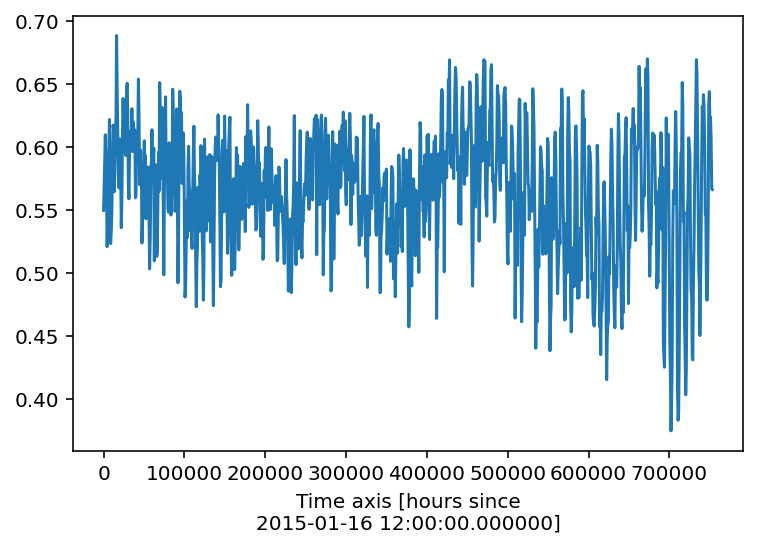

In [119]:
#test sur la variable zos
df_variables = df.query("activity_id=='ScenarioMIP' & table_id == 'Omon' & member_id == 'r4i1p1f1' & variable_id == 'zos'  & experiment_id == 'ssp585' & institution_id == 'IPSL'")
zstore = df_variables.zstore.values[0]
mapper = gcs.get_mapper(zstore)
ds_var = xr.open_zarr(mapper, consolidated=True,decode_times=False)
var = df_variables.variable_id.values[0]
ds_var= ds_var.sel(y=slice(230,330)).sel(x=slice(225,325)).drop_vars(names='time')[var]
ds_tos = ds.sel(y=slice(230,330)).sel(x=slice(225,325)).drop_vars(names='time').tos
corr = xr.corr(ds_var,ds_tos,dim=('x','y'))
corr.plot()

In [19]:
corr_mean

array(0.03396988)

#série temporelle et corrélation de zos par rapport aux autres variables. 

In [4]:
# and load in the SSH data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
#df_ssh = df.query("activity_id=='ScenarioMIP' & table_id == 'Omon' & variable_id == 'zos' & experiment_id == 'ssp585'")
df_ssh = df.query("activity_id=='ScenarioMIP' & table_id == 'Omon' & variable_id == 'tos' & experiment_id == 'ssp585' & institution_id == 'IPSL'")

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ssh.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True,decode_times=False)

df_variables = df.query("activity_id=='ScenarioMIP' & table_id == 'Omon' & member_id == 'r4i1p1f1' & variable_id != 'tos'  & experiment_id == 'ssp585' & institution_id == 'IPSL'")

list_correlation_mean = list()
list_var2 = list()
erreur = 0

for i in range(0,len(df_variables)):
  zstore = df_variables.zstore.values[i]

  # create a mapping interface to the store
  mapper = gcs.get_mapper(zstore)
  ds_var = xr.open_zarr(mapper, consolidated=True,decode_times=False)

  try :
    var = df_variables.variable_id.values[i]
    ds_var= ds_var.sel(y=slice(230,330)).sel(x=slice(225,325)).sel(olevel=0,method='nearest')[var]
    ds_tos = ds.sel(y=slice(230,330)).sel(x=slice(225,325)).tos
    corr = xr.corr(ds_tos,ds_var,dim=('x','y'))
    corr_mean = corr.mean().values
    list_correlation_mean.append(corr_mean)
    list_var2.append(var)
    print(i,' ',var,' ',corr_mean)

  except :
    try:
      var = df_variables.variable_id.values[i]
      ds_var= ds_var.sel(y=slice(230,330)).sel(x=slice(225,325))[var]
      ds_tos = ds.sel(y=slice(230,330)).sel(x=slice(225,325)).tos
      corr = xr.corr(ds_tos,ds_var,dim=('x','y'))
      corr_mean = corr.mean().values
      list_correlation_mean.append(corr_mean)
      list_var2.append(var)
      print(i,' ',var,' ',corr)
    
    except :
      erreur+=1
      print(var,' erreur = ',erreur)

0   umo   0.033969879166557033
1   uo   0.1848624983454945
2   vmo   0.08739221282544869
3   vo   0.10632424457358425
volo  erreur =  1
5   wfo   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(223,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
6   wmo   0.3933908335482906
7   wo   0.26877620103896555
8   zo2min   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(283,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
9   zoocos   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(232,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
10   zos   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(237,), chunktyp

/usr/local/lib/python3.7/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


30   fsitherm   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(495,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
31   fsfe   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(230,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
    depth    float64 0.0
32   froc   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(221,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
33   fric   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(221,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120


/usr/local/lib/python3.7/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


34   ficeberg   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(495,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
35   fgo2   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(219,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
    depth    float64 0.0
36   fgco2   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(220,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
    depth    float64 0.0
37   intppmisc   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(232,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
38   phyc   0.1924101095

/usr/local/lib/python3.7/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


44   obvfsq   nan
45   fbddtdic   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(216,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
    depth    float64 50.0
46   no3os   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(229,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
47   no3   -0.1662901551978921
48   dfeos   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(230,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
49   phycos   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(237,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
5

/usr/local/lib/python3.7/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


60   sfdsi   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(495,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
61   si   -0.3784525621731354
62   phymisc   0.4194186297390447
63   po4   0.038091873372365796
thetaoga  erreur =  7
65   po4os   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(234,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
66   thetao   0.9999999944780126
67   tauvo   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(221,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) int64 0 708 1416 2148 2880 ... 750924 751656 752388 753120
68   tauuo   <xarray.DataArray (time: 1032)>
dask.array<truediv, shape=(1032,), dtype=float64, chunksize=(230,), chunktype=numpy.ndarray>
Coordinates:
  * time

In [5]:
pd.DataFrame(list_correlation_mean,list_var2).to_csv('/content/correlation_mean.csv')

In [15]:
df_correlation = pd.read_csv('/content/correlation_mean.csv')

list_correlation_mean=df_correlation['0'].values
list_var2=df_correlation['Unnamed: 0'].values

In [18]:
def Dmax(correlation_mean,list_var,k):
  dict_max=dict()
  list_correlation_mean_bis = np.array([correlation_mean[i] for i in range(len(correlation_mean))])

  for i in range(k):
    dict_max[list_var[fmax(list_correlation_mean_bis)[1]]]=fmax(list_correlation_mean_bis)[0]
    list_correlation_mean_bis=np.delete(list_correlation_mean_bis,[fmax(list_correlation_mean_bis)[1]])
    list_var=np.delete(list_var,[fmax(list_correlation_mean_bis)[1]])

  return dict_max

def fmax(L):
  max = L[0]
  int_max = 0
  for i in range(1,len(L)):
    if abs(L[i])>=max:
      max=L[i]
      int_max=i
  return [max,int_max]







dict_max = Dmax(list_correlation_mean,list_var2,5)

In [19]:
dict_max

{'dissoc': 0.9345571184800551,
 'evs': 0.8504054596535432,
 'sfdsi': 0.8672543157106875,
 'talk': 0.7429799532373444,
 'thetao': 0.9999999944780126}

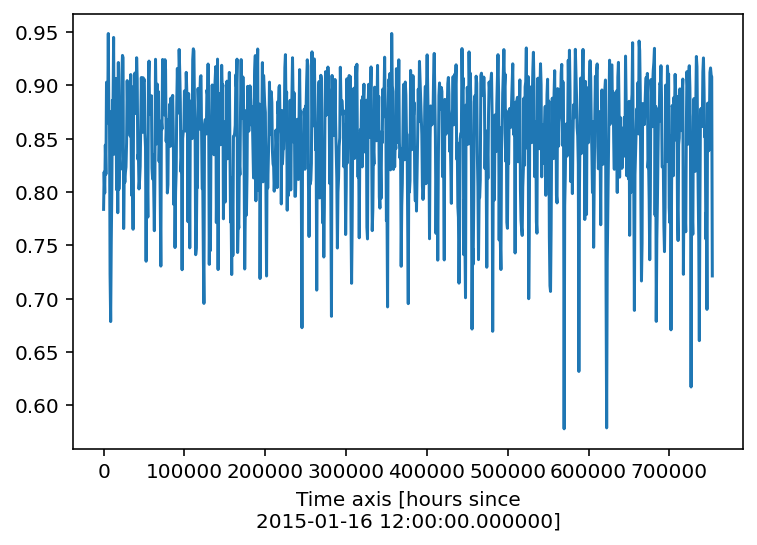

In [22]:
# and load in the SSH data
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
#df_ssh = df.query("activity_id=='ScenarioMIP' & table_id == 'Omon' & variable_id == 'zos' & experiment_id == 'ssp585'")
df_ssh = df.query("activity_id=='ScenarioMIP' & table_id == 'Omon' & variable_id == 'tos' & experiment_id == 'ssp585' & institution_id == 'IPSL'")

# setup the gcs access
gcs = gcsfs.GCSFileSystem(token='anon')

# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ssh.zstore.values[-1]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True,decode_times=False)

df_variables = df.query("activity_id=='ScenarioMIP' & table_id == 'Omon' & member_id == 'r4i1p1f1' & variable_id == 'evs'  & experiment_id == 'ssp585' & institution_id == 'IPSL'")
zstore = df_variables.zstore.values[0]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)
ds_var = xr.open_zarr(mapper, consolidated=True,decode_times=False)
var = df_variables.variable_id.values[0]
ds_var= ds_var.sel(y=slice(230,330)).sel(x=slice(225,325))[var]
ds_tos = ds.sel(y=slice(230,330)).sel(x=slice(225,325)).tos
xr.corr(ds_tos,ds_var,dim=('x','y')).plot()

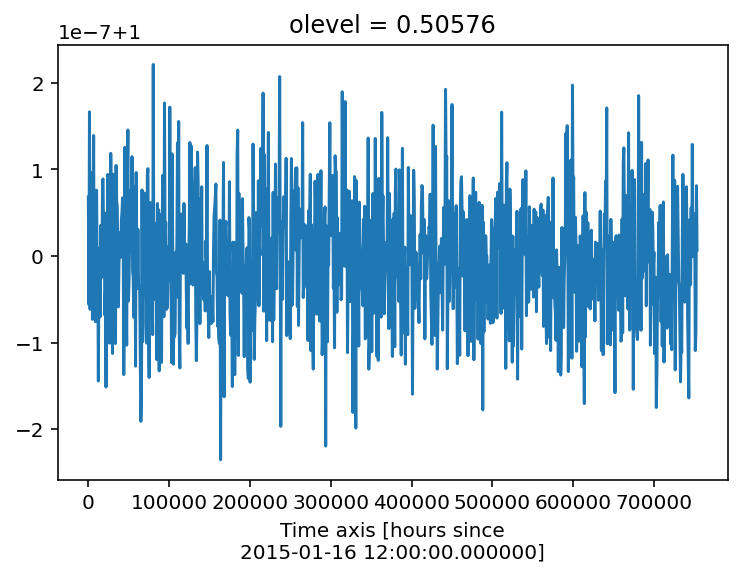

In [23]:
df_variables = df.query("activity_id=='ScenarioMIP' & table_id == 'Omon' & member_id == 'r4i1p1f1' & variable_id == 'thetao'  & experiment_id == 'ssp585' & institution_id == 'IPSL'")
zstore = df_variables.zstore.values[0]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)
ds_var = xr.open_zarr(mapper, consolidated=True,decode_times=False)
var = df_variables.variable_id.values[0]
ds_var= ds_var.sel(y=slice(230,330)).sel(x=slice(225,325)).sel(olevel=0,method='nearest')[var]
ds_tos = ds.sel(y=slice(230,330)).sel(x=slice(225,325)).tos
xr.corr(ds_tos,ds_var,dim=('x','y')).plot()

In [52]:
df_variables = df.query("activity_id=='ScenarioMIP' & table_id == 'Omon' & member_id == 'r4i1p1f1' & variable_id == 'dissoc'  & experiment_id == 'ssp585' & institution_id == 'IPSL'")
zstore = df_variables.zstore.values[0]

# create a mapping interface to the store
mapper = gcs.get_mapper(zstore)
ds_var = xr.open_zarr(mapper, consolidated=True,decode_times=False)
var = df_variables.variable_id.values[0]
ds_var= ds_var.sel(y=slice(230,330)).sel(x=slice(225,325)).sel(olevel=0,method='nearest')[var]
ds_tos = ds.sel(y=slice(230,330)).sel(x=slice(225,325)).tos
xr.corr(ds_tos,ds_var,dim=('x','y')).plot()

array(0.51676079)